<b><font size=20, color='#A020F0'>573 Final Project

Daniel Jablonski<br>
12/15/21<br>
Lake-Effect Snow Case Study

## Import packages used in code.

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import metpy.plots as mplots
import matplotlib as mpl
import netCDF4
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT
import matplotlib.colors as mplc
import cartopy.feature as cfeature

## About the Data

My data is all from Otsego County in Michigan. It includes upper-air soundings, snowfall totals, and average lake surface temperature data. The upper-air sounding data was pulled from the university of wyoming archive website. http://weather.uwyo.edu/upperair/sounding.html The events I chose by searching the county up on the NOAA National Centers for Environmental Information Storm Event Database. https://www.ncdc.noaa.gov/stormevents/ I then went to the Climate Data Online search under the same NOAA organization to get my snowfall data under a daily totals dataset. https://www.ncdc.noaa.gov/cdo-web/search My average lake surface temperature data was retrieved from the NOAA CoastWatch Great Lakes logoCatalog. https://coastwatch.glerl.noaa.gov/thredds/Satellite/glsea/glsea_catalog.html

## Reading in the data for each LES event.

Read in the sounding data only up to 100 hPa using pandas.read_csv. Read in the average Lake Surface Temperature data using netCDF4.Dataset. Read in Snowfall using pandas.read_csv.

In [2]:
sound1=pd.read_csv('sounding2006.txt',sep='\s+',skiprows=1,nrows=50,header=[1])
sound1=sound1.drop(sound1.index[0:3]).astype(float)

In [3]:
sound2=pd.read_csv('sounding2010.txt',sep='\s+',skiprows=1,nrows=92,header=[1])
sound2=sound2.drop(sound2.index[0:3]).astype(float)

In [4]:
sound3=pd.read_csv('sounding2016.txt',sep='\s+',skiprows=1,nrows=84,header=[1])
sound3=sound3.drop(sound3.index[0:3]).astype(float)

In [5]:
lakeSurface1=netCDF4.Dataset('2006_306_glsea_sst.nc')
lakeSurface2=netCDF4.Dataset('2010_339_glsea_sst.nc')
lakeSurface3=netCDF4.Dataset('2016_343_glsea_sst.nc')

In [6]:
snowfall1=pd.read_csv('11022006.csv',sep=',')
snowfall2=pd.read_csv('12052010.csv',sep=',')
snowfall3=pd.read_csv('12092016.csv',sep=',')

## Work with the data to be more useful with plotting.

Give lables to the three variables in the lake surface temperature data. Lake surface 'temp', 'Lon', and 'Lat'.

In [7]:
lst1=lakeSurface1.variables['sst']
lon1=lakeSurface1.variables['lon']
lat1=lakeSurface1.variables['lat']

lst2=lakeSurface2.variables['sst']
lon2=lakeSurface2.variables['lon']
lat2=lakeSurface2.variables['lat']

lst3=lakeSurface3.variables['sst']
lon3=lakeSurface3.variables['lon']
lat3=lakeSurface3.variables['lat']

Adding units to sounding data and calculating the wind components for the event soundings to help show the vertical wind shear.

In [8]:
pres1=sound1['PRES'].values[:]*units.hPa
hght1=sound1['HGHT'].values[:]*units.meters
temp1=sound1['TEMP'].values[:]*units.celsius
dwpt1=sound1['DWPT'].values[:]*units.celsius
drct1=sound1['DRCT'].values[:]*units.deg
sknt1=sound1['SKNT'].values[:]*units.knots

knots_to_mps1=sknt1.to('meters/second')
winds1=mpcalc.wind_components(knots_to_mps1,drct1)
winds_u1=winds1[0]
winds_v1=winds1[1]

pres2=sound2['PRES'].values[:]*units.hPa
hght2=sound2['HGHT'].values[:]*units.meters
temp2=sound2['TEMP'].values[:]*units.celsius
dwpt2=sound2['DWPT'].values[:]*units.celsius
drct2=sound2['DRCT'].values[:]*units.deg
sknt2=sound2['SKNT'].values[:]*units.knots

knots_to_mps2=sknt2.to('meters/second')
winds2=mpcalc.wind_components(knots_to_mps2,drct2)
winds_u2=winds2[0]
winds_v2=winds2[1]

pres3=sound3['PRES'].values[:]*units.hPa
hght3=sound3['HGHT'].values[:]*units.meters
temp3=sound3['TEMP'].values[:]*units.celsius
dwpt3=sound3['DWPT'].values[:]*units.celsius
drct3=sound3['DRCT'].values[:]*units.deg
sknt3=sound3['SKNT'].values[:]*units.knots

knots_to_mps3=sknt3.to('meters/second')
winds3=mpcalc.wind_components(knots_to_mps3,drct3)
winds_u3=winds3[0]
winds_v3=winds3[1]

Droping sites from the snowfall data that have no recorded snow measurements.

In [9]:
snowfall1=snowfall1.drop(labels=[0,1],axis=0)
snowfall1

STATION                      NAME        DATE  SNOW
2  USC00203096            GAYLORD, MI US  2006-11-02   5.0
3  USC00203096            GAYLORD, MI US  2006-11-03   5.5
4  USC00203099      GAYLORD 9 SSW, MI US  2006-11-02   0.5
5  USC00203099      GAYLORD 9 SSW, MI US  2006-11-03   8.7
6  USC00208417  VANDERBILT 11 ENE, MI US  2006-11-02   0.8
7  USC00208417  VANDERBILT 11 ENE, MI US  2006-11-03   2.5

In [10]:
snowfall2=snowfall2.drop(labels=[0,1,8,9,12,13],axis=0)
snowfall2

STATION                      NAME        DATE  SNOW
2   USC00203096            GAYLORD, MI US  2010-12-05   0.0
3   USC00203096            GAYLORD, MI US  2010-12-06   2.9
4   USC00203099      GAYLORD 9 SSW, MI US  2010-12-05   0.0
5   USC00203099      GAYLORD 9 SSW, MI US  2010-12-06   3.5
6   US1MIOT0007    GAYLORD 1.8 ESE, MI US  2010-12-05   0.0
7   US1MIOT0007    GAYLORD 1.8 ESE, MI US  2010-12-06   0.2
10  USC00208417  VANDERBILT 11 ENE, MI US  2010-12-05   0.0
11  USC00208417  VANDERBILT 11 ENE, MI US  2010-12-06   0.1

In [11]:
snowfall3=snowfall3.drop(labels=[0,1,8,9],axis=0)
snowfall3

STATION                      NAME        DATE  SNOW
2  USC00203096            GAYLORD, MI US  2016-12-08   0.4
3  USC00203096            GAYLORD, MI US  2016-12-09   4.0
4  USC00203099      GAYLORD 9 SSW, MI US  2016-12-08   5.6
5  USC00203099      GAYLORD 9 SSW, MI US  2016-12-09   5.3
6  USC00208417  VANDERBILT 11 ENE, MI US  2016-12-08   1.2
7  USC00208417  VANDERBILT 11 ENE, MI US  2016-12-09   2.6

# Plotting the data

Setting the Font.

In [12]:
mpl.rcParams['font.family'] = 'serif'

## Plotting the SkewT's for each event.

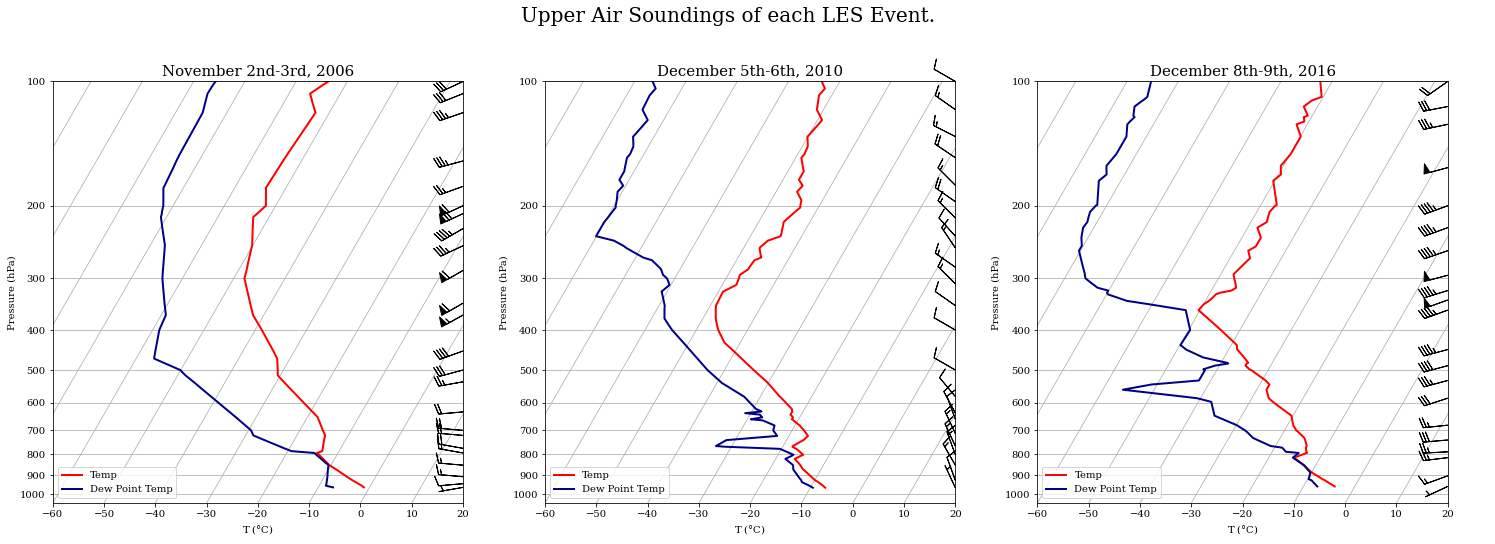

In [37]:
fig=plt.figure(figsize=(25,16))
fig.suptitle('Upper Air Soundings of each LES Event.',font='serif',fontsize=20,y=0.75)
gs=gridspec.GridSpec(1,3)

skew1=SkewT(fig,subplot=gs[0,0])
skew1.plot(pres1,temp1,'red',label='Temp',linewidth=2)
skew1.plot(pres1,dwpt1,'darkblue',label='Dew Point Temp',linewidth=2)
skew1.plot_barbs(pres1[::2],winds_u1[::2],winds_v1[::2])
plt.title('November 2nd-3rd, 2006',font='serif',fontsize=15)
plt.xlim(-60,20)
plt.xlabel('T ($\degree$C)');
plt.ylabel('Pressure (hPa)');
plt.legend(loc=3)

skew2=SkewT(fig,subplot=gs[0,1])
skew2.plot(pres2,temp2,'red',label='Temp',linewidth=2)
skew2.plot(pres2,dwpt2,'darkblue',label='Dew Point Temp',linewidth=2)
skew2.plot_barbs(pres2[::4],winds_u2[::4],winds_v2[::4])
plt.title('December 5th-6th, 2010',font='serif',fontsize=15)
plt.xlim(-60,20)
plt.xlabel('T ($\degree$C)');
plt.ylabel('Pressure (hPa)');
plt.legend(loc=3)

skew3=SkewT(fig,subplot=gs[0,2])
skew3.plot(pres3,temp3,'red',label='Temp',linewidth=2)
skew3.plot(pres3,dwpt3,'darkblue',label='Dew Point Temp',linewidth=2)
skew3.plot_barbs(pres3[::4],winds_u3[::4],winds_v3[::4])
plt.title('December 8th-9th, 2016',font='serif',fontsize=15)
plt.xlim(-60,20)
plt.xlabel('T ($\degree$C)');
plt.ylabel('Pressure (hPa)');
plt.legend(loc=3)

## Plotting the Lake Surface Temperatures for each event.

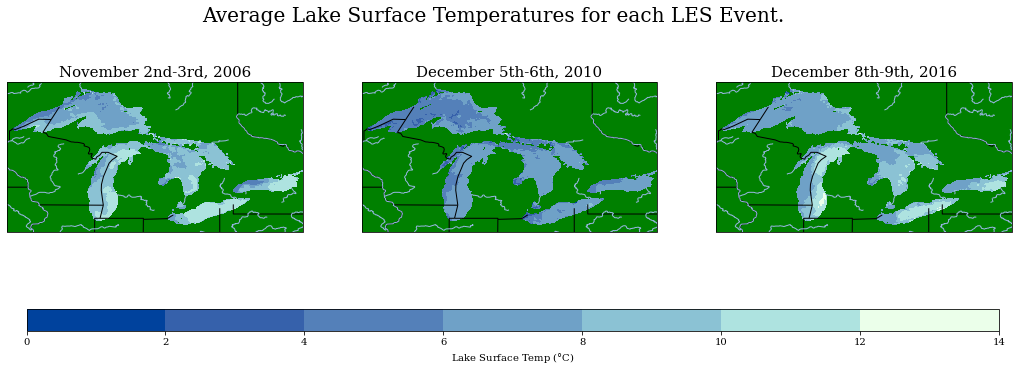

In [24]:
gs=gridspec.GridSpec(nrows=3,ncols=3)
fig=plt.figure(figsize=(18,6))
fig.suptitle('Average Lake Surface Temperatures for each LES Event.',y=0.85,font='serif',fontsize=20)

cmap=mplc.ListedColormap(['#00429d','#3661ab','#5480b9','#6fa1c7','#8bc2d4','#aee3e0','#ebffea'])

#Create state and province boundaries to use in "ax.add_feature" for all plots.
states_provinces=cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

ax1=fig.add_subplot(gs[:,0],projection=ccrs.PlateCarree())
cs=ax1.contourf(np.array(lon1),np.array(lat1),lst1[0],cmap=cmap)
ax1.add_feature(states_provinces,edgecolor='black')
ax1.add_feature(cfeature.LAND,color='g')
ax1.add_feature(cfeature.RIVERS)
ax1.set_title('November 2nd-3rd, 2006',font='serif',fontsize=15)

ax2=fig.add_subplot(gs[:,1],projection=ccrs.PlateCarree())
ax2.contourf(np.array(lon2),np.array(lat2),lst2[0],cmap=cmap)
ax2.add_feature(states_provinces,edgecolor='black')
ax2.add_feature(cfeature.LAND,color='g')
ax2.add_feature(cfeature.RIVERS)
ax2.set_title('December 5th-6th, 2010',font='serif',fontsize=15)

ax3=fig.add_subplot(gs[:,2],projection=ccrs.PlateCarree())
ax3.contourf(np.array(lon3),np.array(lat3),lst3[0],cmap=cmap)
ax3.add_feature(states_provinces,edgecolor='black')
ax3.add_feature(cfeature.LAND,color='g')
ax3.add_feature(cfeature.RIVERS)
ax3.set_title('December 8th-9th, 2016',font='serif',fontsize=15)

#colorbar
cax=fig.add_axes([0.14,0.10,0.75,0.05])
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal',label='Lake Surface Temp ($\degree$C)')

## Plotting the snowfall totals at each station at the beginning and end of the LES event.

/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/opt/anaconda3/envs/AOS573_F21/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'December 8th-9th, 2016')

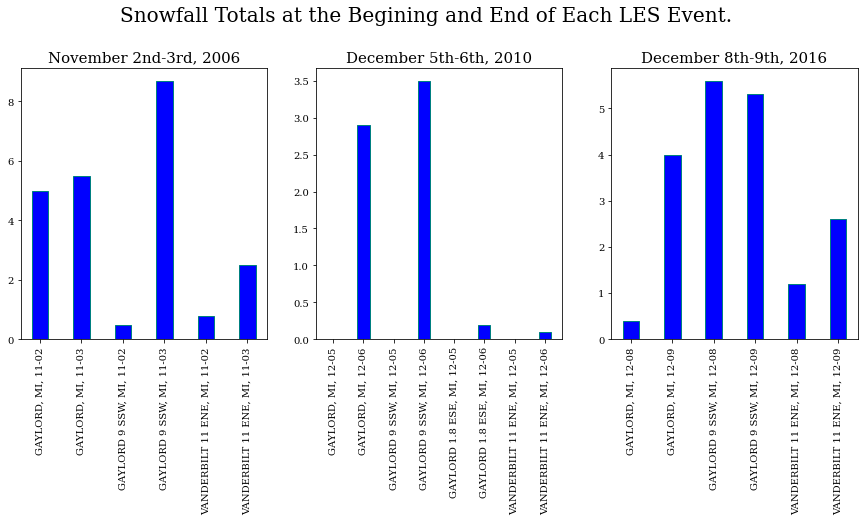

In [25]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
axs=ax.flatten()
fig.suptitle('Snowfall Totals at the Beginning and End of Each LES Event.',y=1.05,font='serif',fontsize=20)

snow1=ax[0].bar(np.arange(0,6),snowfall1.SNOW,0.4,color='blue',ec='teal')
ax[0].set_xticklabels(("","GAYLORD, MI, 11-02","GAYLORD, MI, 11-03","GAYLORD 9 SSW, MI, 11-02","GAYLORD 9 SSW, MI, 11-03",
                       "VANDERBILT 11 ENE, MI, 11-02","VANDERBILT 11 ENE, MI, 11-03"),rotation=90)
ax[0].set_title('November 2nd-3rd, 2006',font='serif',fontsize=15)


snow2=ax[1].bar(np.arange(0,8),snowfall2.SNOW,0.4,color='blue',ec='teal')
ax[1].set_xticks(np.arange(0,8))
ax[1].set_xticklabels(("GAYLORD, MI, 12-05","GAYLORD, MI, 12-06","GAYLORD 9 SSW, MI, 12-05","GAYLORD 9 SSW, MI, 12-06",
                       "GAYLORD 1.8 ESE, MI, 12-05","GAYLORD 1.8 ESE, MI, 12-06","VANDERBILT 11 ENE, MI, 12-05",
                       "VANDERBILT 11 ENE, MI, 12-06"),rotation=90)
ax[1].set_title('December 5th-6th, 2010',font='serif',fontsize=15)


snow3=ax[2].bar(np.arange(0,6),snowfall3.SNOW,0.4,color='blue',ec='teal')
ax[2].set_xticklabels(("","GAYLORD, MI, 12-08","GAYLORD, MI, 12-09","GAYLORD 9 SSW, MI, 12-08","GAYLORD 9 SSW, MI, 12-09",
                       "VANDERBILT 11 ENE, MI, 12-08","VANDERBILT 11 ENE, MI, 12-09"),rotation=90)
ax[2].set_title('December 8th-9th, 2016',font='serif',fontsize=15)

## Reflection

Overall I think that these visuals that I created in this final coding project illuminate the impact that surface lake temperature and the cold uppper-air profile have on lake effect snowfall downstream. In an idea world, it would be better to take data closer to the lakes to get more visable results. It would also be great to take one case study and, be able to visualize along more than just one county to see the effects of the LES event. However this would be out of the scope of my abilities with the timeline that I had left and the difficulty to get such data for some locations.